In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from utils import import_dataset

In [2]:
dataset = import_dataset()

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'genre', 'text', 'labels'],
        num_rows: 2476
    })
    eval: Dataset({
        features: ['title', 'genre', 'text', 'labels'],
        num_rows: 309
    })
    test: Dataset({
        features: ['title', 'genre', 'text', 'labels'],
        num_rows: 310
    })
})

In [4]:
y_train = dataset['train']['labels']
y_test = dataset['test']['labels']

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)
x_train = vectorizer.fit_transform(dataset['train']['text'])
x_test = vectorizer.transform(dataset['test']['text'])

model = SVC()
model.fit(x_train,y_train)

predictions = model.predict(x_test)
print("Accuracy of model is {}%".format(accuracy_score(y_test,predictions) * 100))

Accuracy of model is 73.87096774193549%


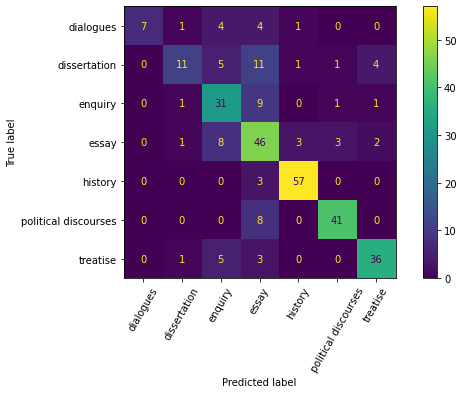

In [6]:
import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classes = ['dialogues', 'dissertation', 'enquiry', 'essay', 
                         'history', 'political discourses', 'treatise']

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax)
ax.xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6], classes, rotation=60)
ax.yaxis.set_ticks([0, 1, 2, 3, 4, 5, 6], classes)

In [7]:
# it mostly mistakes essay-like things for essay-like things

In [8]:
# mistakes concerning history

for i in range(len(y_test)):
    t = y_test[i]
    p = predictions[i]
    
    if t == 4 and p != 4:
        print(f'history for {classes[p]}', i)
        print(dataset['test'][i])
        print()
    elif p == 4 and t != 4:
        print(f'{classes[t]} for history', i)
        print(dataset['test'][i])
        print()
    

history for essay 28
{'title': 'LII', 'genre': 'history', 'text': "It was urged by Hambden's council[, and by his partizans in the nation,]{Va(1754), 217.27: [ ]} that the plea of necessity was in vain introduced into a trial of law; since it was the nature of necessity to abolish all law, and, by irresistible violence, to dissolve all the weaker and more artificial ties of human society. Not only the prince, in cases of extreme distress, is exempted from the ordinary rules of administration: All orders of men are then levelled; and any individual may consult the public safety by any expedient, which his situation enables him to employ. But to produce so violent an effect, and so hazardous to every community, an ordinary danger or difficulty is not sufficient; much less, a necessity, which is merely factitious and pretended. Where the peril is urgent and extreme, it will be palpable to every member of the society; and though all ancient rules of government are in that case abrogated, m